In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import glob
import tqdm
import seaborn as sns
sns.set()

In [2]:
from math import floor, log10

def sci_notation(num, decimal_digits=1, precision=None, exponent=None):
    """
    Returns a string representation of the scientific
    notation of the given number formatted for use with
    LaTeX or Mathtext, with specified number of significant
    decimal digits and precision (number of decimal digits
    to show). The exponent to be used can also be specified
    explicitly.
    """
    if exponent is None:
        exponent = int(floor(log10(abs(num))))
    coeff = round(num / float(10**exponent), decimal_digits)
    if precision is None:
        precision = decimal_digits

    return r"${0:.{2}f}\times 10^{{{1:d}}}$".format(coeff, exponent, precision)


## IDL lines

$\textbf{ten has been replaced by flines which makes more sense}$

<code>IDL
    openr, ten, 'fkrplk.test', /get_lun ;open .test and named ten
    readf, ten, dt, tmax, dy, rhomax ;read first line
</code>

In [3]:
with open("fkrplk.test", "r") as file:
    flines = file.readlines()

f_list = [float(i) for i in flines[0].split(" ") if i.strip()]
dt = f_list[0]
tmax = f_list[1]
dy = f_list[2]
rhomax = f_list[3]

print("dt=%f, tmax=%f, dy=%f, rhomax=%f"%(dt,tmax,dy,rhomax))

dt=0.000590, tmax=10.507000, dy=0.000035, rhomax=100000000000.000000


<code>IDL
    readf, ten, newr, nmu, ntau, ntr ;read second line
</code>

In [4]:
f_list = [int(i) for i in flines[1].split(" ") if i.strip()]
newr = int(f_list[0])
nmu = int(f_list[1])
ntau = int(f_list[2])
ntr = int(f_list[3])

print("newr=%i, nmu=%i, ntau=%i, ntr=%i"%(newr,nmu,ntau,ntr))

newr=60, nmu=30, ntau=30, ntr=8


## Continues
It creates arrays of zeros with different sizes. 
I will see if this is necessary in Python or if it is possible to use a turn around.

<font size="5">Starting at line 3, all values were unrolled to 1D array
and lenghts given in IDL .pro are used to extract variables values</font>


<code>IDL
    ekev = fltarr(newr+1) ;array zeros lenght newr+1
    amu = fltarr(2*nmu+1) ;array zeros lenght 2nmu+1
    dtau = fltarr(ntau) ;array zeros lenght ntau
    tau = dtau ;tau = dtau
    soft = dtau & bm = fltarr(ntau+1) ;array zeros soft lenght dtau and bm lenght ntau+1
    tr = fltarr(ntr+1) ;array zeros lenght ntr+1
</code>
   
 It puts all the folowing values til the match the proper lenght within the ekev array
 
<code>IDL
    readf, ten, ekev
    eta = double(ekev/510.99)
    beta = sqrt(1.0-1.0/(eta+1.0)^2)
    eta = eta^2/(eta+1.0)
    </code>

In [5]:
#From line 3(idx 2) all values are unrolled
#Making a single array which contain all values
unrolled_values = np.array([float(i) for j in range(2,len(flines)) for i in flines[j].split(" ")  if i.strip()])

In [6]:
ekev = unrolled_values[0:newr+1].copy()
nstart = newr+1 #Defines newstart for next variable
eta = ekev/510.99
beta = np.sqrt(1-(1/(eta+1)**2))
eta = eta**2/(eta+1)
ekev,eta

(array([ 10.    ,  12.5   ,  15.132 ,  17.9029,  20.8201,  23.8913,
         27.1247,  30.5287,  34.1124,  37.8854,  41.8575,  46.0393,
         50.4419,  55.0769,  59.9565,  65.0938,  70.5023,  76.1963,
         82.1909,  88.502 ,  95.1463, 102.141 , 109.506 , 117.259 ,
        125.421 , 134.014 , 143.061 , 152.586 , 162.613 , 173.17  ,
        184.284 , 195.984 , 208.303 , 221.271 , 234.925 , 249.299 ,
        264.432 , 280.364 , 297.137 , 314.795 , 333.386 , 352.958 ,
        373.563 , 395.256 , 418.094 , 442.138 , 467.452 , 494.101 ,
        522.158 , 551.695 , 582.792 , 615.531 , 649.998 , 686.284 ,
        724.486 , 764.705 , 807.047 , 851.625 , 898.555 , 947.964 ,
        999.98  ]),
 array([3.75628219e-04, 5.84116178e-04, 8.51714031e-04, 1.18595069e-03,
        1.59513205e-03, 2.08838107e-03, 2.67573211e-03, 3.36814487e-03,
        4.17766927e-03, 5.11749688e-03, 6.20195800e-03, 7.44675358e-03,
        8.86897411e-03, 1.04871822e-02, 1.23215326e-02, 1.43939897e-02,
        1.67

## Continues...
It continues to fill variables 
<code>IDL
    readf, ten, amu
    pad = 180.0*acos(amu)/!Pi
    readf, ten, dtau
    readf, ten, tau
    tau = [0.0, tau]
    readf, ten, soft
    soft = [0.0,soft]
    readf, ten, bm
    </code>

In [7]:
amu = unrolled_values[nstart:nstart+(2*nmu+1)] #2*nmu+1 defines size but it has to start where it finished last time and goes til lenght 
nstart = nstart+(2*nmu+1) #Defines newstart for next variable
pad = 180.*np.arccos(amu)/np.pi
pad

array([180.        , 165.16496301, 158.96047702, 154.15806724,
       150.07360342, 146.44265569, 143.13010235, 140.05552456,
       137.16654384, 134.427004  , 131.81034052, 129.29645556,
       126.86989765, 124.51813102, 122.23093006, 120.        ,
       117.81816088, 115.67926743, 113.57817848, 111.5102088 ,
       109.47120038, 107.45760312, 105.46602977, 103.49337918,
       101.53695903,  99.5940876 ,  97.66223639,  95.73917048,
        93.82255564,  91.91021126,  90.        ,  88.08978874,
        86.17744436,  84.26082952,  82.33776361,  80.4059124 ,
        78.46304097,  76.50662082,  74.53397023,  72.54239688,
        70.52879962,  68.4897912 ,  66.42182152,  64.32073257,
        62.18183912,  60.        ,  57.76906994,  55.48186898,
        53.13010235,  50.70354444,  48.18965948,  45.572996  ,
        42.83345616,  39.94447544,  36.86989765,  33.55734431,
        29.92639658,  25.84193276,  21.03952298,  14.83503699,
         0.        ])

In [8]:
dtau = unrolled_values[nstart:nstart+ntau] #ntau defines lenght and nstart the index in which it starts
nstart = nstart+ntau
dtau

array([6.66667e-05, 6.66667e-05, 6.66667e-05, 6.66667e-05, 6.66667e-05,
       6.66667e-05, 6.66667e-05, 6.66667e-05, 6.66667e-05, 6.66666e-05,
       6.66667e-05, 6.66667e-05, 6.66666e-05, 6.66667e-05, 6.66667e-05,
       6.66666e-05, 6.66666e-05, 6.66667e-05, 6.66666e-05, 6.66666e-05,
       6.66667e-05, 6.66666e-05, 6.66666e-05, 6.66667e-05, 6.66666e-05,
       6.66666e-05, 6.66666e-05, 6.66667e-05, 6.66666e-05, 6.66667e-05])

In [9]:
# Both in tau and soft a 0 is inserted at the beggining of array using np.insert
tau = np.insert(unrolled_values[nstart:nstart+ntau], 0, 0) #in the original code they make tau=dtau meaning they got the same lenght
nstart = nstart+ntau #Defines newstart for next variable
soft = np.insert(unrolled_values[nstart:nstart+ntau], 0, 0, axis=0) #in the original code they make soft=dtau meaning they got the same lenght
nstart = nstart+ntau #Defines newstart for next variable
tau,soft

(array([0.00000e+00, 6.66667e-05, 1.33333e-04, 2.00000e-04, 2.66667e-04,
        3.33333e-04, 4.00000e-04, 4.66667e-04, 5.33333e-04, 6.00000e-04,
        6.66667e-04, 7.33333e-04, 8.00000e-04, 8.66667e-04, 9.33333e-04,
        1.00000e-03, 1.06667e-03, 1.13333e-03, 1.20000e-03, 1.26667e-03,
        1.33333e-03, 1.40000e-03, 1.46667e-03, 1.53333e-03, 1.60000e-03,
        1.66667e-03, 1.73333e-03, 1.80000e-03, 1.86667e-03, 1.93333e-03,
        2.00000e-03]),
 array([0.00000e+00, 3.33333e+07, 6.66667e+07, 1.00000e+08, 1.33333e+08,
        1.66667e+08, 2.00000e+08, 2.33333e+08, 2.66667e+08, 3.00000e+08,
        3.33333e+08, 3.66667e+08, 4.00000e+08, 4.33333e+08, 4.66667e+08,
        5.00000e+08, 5.33333e+08, 5.66667e+08, 6.00000e+08, 6.33333e+08,
        6.66667e+08, 7.00000e+08, 7.33333e+08, 7.66667e+08, 8.00000e+08,
        8.33333e+08, 8.66667e+08, 9.00000e+08, 9.33333e+08, 9.66667e+08,
        1.00000e+09]))

In [10]:
bm = unrolled_values[nstart:nstart+ntau+1]
nstart = nstart+ntau+1 #Defines newstart for next variable
bm

array([100.   , 100.111, 100.444, 101.   , 101.778, 102.778, 104.   ,
       105.444, 107.111, 109.   , 111.111, 113.444, 116.   , 118.778,
       121.778, 125.   , 128.444, 132.111, 136.   , 140.111, 144.444,
       149.   , 153.778, 158.778, 164.   , 169.444, 175.111, 181.   ,
       187.111, 193.444, 200.   ])

<font size="3">Here we have to extract values in a foor loop</font>

<code>IDL
    phi = fltarr(newr+1, 2*nmu+1, ntau+1, ntr+1)
    tphi = phi( *, *, *, 0)
    i = fltarr(ntr+1)
    temp = fltarr(2)
    FOR itr = 0, ntr DO BEGIN
       readf, ten, temp
       tr(itr) = temp(0)
       i(itr) = temp(1)
       readf, ten, tphi
       phi( *, *, *, itr) = tphi
    ENDFOR
    free_lun, ten
    </code>

In [11]:
#We make a new array with the remaining values to work with
arr_remained = unrolled_values[nstart:].copy()

In [12]:
chuncksize = (newr+1) * (2*nmu+1) * (ntau+1) ## Size of values inbetween indented values
tr = arr_remained[::chuncksize+2]
i = arr_remained[1::chuncksize+2]

In [13]:
# It extracts all values in between indented numbers
# Resulting array has the size of the tr times chunksize


phi_plain = []
for idx in tqdm.tqdm(range(len(tr)-1)):
    idxinit = np.argwhere(arr_remained==i[idx])[0][0] + 1
    idxfina = np.argwhere(arr_remained==tr[idx+1])[0][0]
    arr_tri = arr_remained[idxinit:idxfina].copy()
    phi_plain.append(arr_tri)
    if idx == (len(tr)-2):
        idxinit = np.argwhere(arr_remained==i[idx+1])[0][0] + 1
        arr_tri = arr_remained[idxinit:].copy()
        phi_plain.append(arr_tri)
        
phi_plain = np.array(phi_plain)    

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 330.28it/s]


In [14]:
## Reshape data to match IDL phi
# Python goes backwards compare to IDL, so shape is: ntr+1,(ntau+1),(newr+1),(2*nmu+1)
phi = np.reshape(phi_plain,newshape=(ntr+1,(ntau+1),(newr+1),(2*nmu+1)))

<font size="3">First qtties E0-4, REFORM does nothing</font>

<code>IDL
    ;Specify the values of the indices that remain fixed
    paindex=0
    sindex=10
    eindex=10
    ;Plot data
    phiE0 = Reform(phi(*,paindex,sindex,0))
    phiE1 = Reform(phi(*,paindex,sindex,1))
    phiE2 = Reform(phi(*,paindex,sindex,2))
    phiE3 = Reform(phi(*,paindex,sindex,3))
    phiE4 = Reform(phi(*,paindex,sindex,4))
    </code>

In [15]:
paindex=0
sindex=10
eindex=10


In [16]:
phiE0 = phi[0,sindex,paindex,:].copy()
phiE1 = phi[1,sindex,paindex,:].copy()
phiE2 = phi[2,sindex,paindex,:].copy()
phiE3 = phi[3,sindex,paindex,:].copy()
phiE4 = phi[4,sindex,paindex,:].copy()

<font size="3">Plot 1: Window 0</font>

<code>IDL
    Window,0,Title = 'Energy Dependence'
    plot, ekev, phiE0,/XLog,/YLog,XTitle = 'Energy (keV)', $
      YTitle = 'Normalized Density', $
      Title = 'Electron Distribution Function Energy Dependence',$
      XRange=[10.,1000.],YRange=[1.E-30,1.E00],XStyle=1,YStyle=1
    oplot, ekev, phiE1, LineStyle = 1, color=112
    oplot, ekev, phiE2, LineStyle = 2, color=208
    oplot, ekev, phiE3, LineStyle = 3, color=165
    oplot, ekev, phiE4, LineStyle = 4, color=254
    ;Create and position Legend for electron distribution function vs. energy graph
    XYOutS, 1.0E+02, 1.0E-02, 'Pitch Angle = '+ strtrim((pad(paindex)),2)+' degrees', Size = 1.3
    XYOutS, 1.0E+02, 1.0E-04, 'Position = '+ strtrim((soft(sindex)),2)+' km', Size = 1.3
    </code>

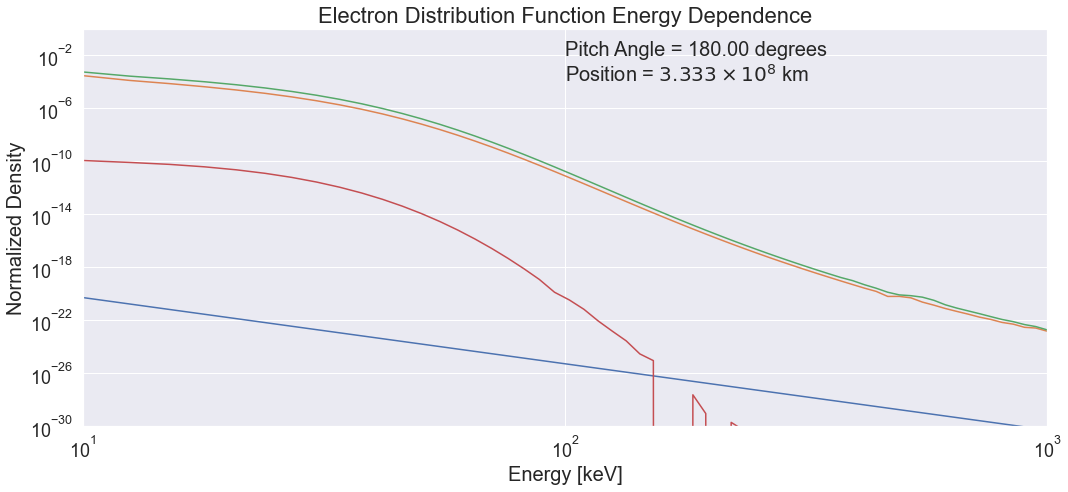

In [17]:
fig, ax = plt.subplots(ncols=1,figsize=(15,7))

ax.set_title(r"Electron Distribution Function Energy Dependence",fontsize=22)
ax.set_xlabel(r"Energy [keV]",fontsize=20)
ax.set_ylabel(r"Normalized Density",fontsize=20)

ax.plot(ekev,phiE0)
ax.plot(ekev,phiE1)
ax.plot(ekev,phiE2)
ax.plot(ekev,phiE3)
ax.plot(ekev,phiE4)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(10,1000)
ax.set_ylim(1e-30,1)
ax.text(1.0e2, 1.0e-2,r"Pitch Angle = %.2f degrees"%(pad[paindex]),fontsize=20)
ax.text(1.0e2, 1.0e-4,r"Position = %s km"%(sci_notation(soft[sindex],4,3)),fontsize=20)

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=12)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis='both', which='major', labelsize=18,)


plt.tight_layout()

plt.savefig('./Window0.jpg',dpi=150,bbox_inches= 'tight',pad_inches = 0.05)

<font size="3">Plot 2: variables</font>

<code>IDL
    phiPA0 = Reform(phi(eindex,*,sindex,0))
    phiPA1 = Reform(phi(eindex,*,sindex,1))
    phiPA2 = Reform(phi(eindex,*,sindex,2))
    phiPA3 = Reform(phi(eindex,*,sindex,3))
    phiPA4 = Reform(phi(eindex,*,sindex,4))
    </code>
    
<font size="3">Plot 2: Window 1</font>

<code>IDL
    Window,1,Title = 'Pitch Angle Dependence'
    plot, pad, phiPA0,/YLog,XTitle = 'Pitch Angle (degrees)', $
      YTitle = 'Normalized Density', $
      Title = 'Electron Distribution Function Pitch Angle Dependence',$
      XRange=[0.,180.],YRange=[1.E-30,1.E00],XStyle=1,YStyle=1
    oplot, pad, phiPA1, LineStyle = 1, color=112
    oplot, pad, phiPA2, LineStyle = 2, color=208
    oplot, pad, phiPA3, LineStyle = 3, color=165
    oplot, pad, phiPA4, LineStyle = 4, color=254
    ;Create and position Legend for electron distribution function vs. pitch angle graph
    XYOutS, 90., 1.0E-02, 'Energy = '+ strtrim((ekev(eindex)),2)+' keV', Size = 1.3
    XYOutS, 90., 1.0E-04, 'Position = '+ strtrim((soft(sindex)),2)+' km', Size = 1.3
    </code>

In [18]:
phiPA0 = phi[0,sindex,:,eindex].copy()
phiPA1 = phi[1,sindex,:,eindex].copy()
phiPA2 = phi[2,sindex,:,eindex].copy()
phiPA3 = phi[3,sindex,:,eindex].copy()
phiPA4 = phi[4,sindex,:,eindex].copy()

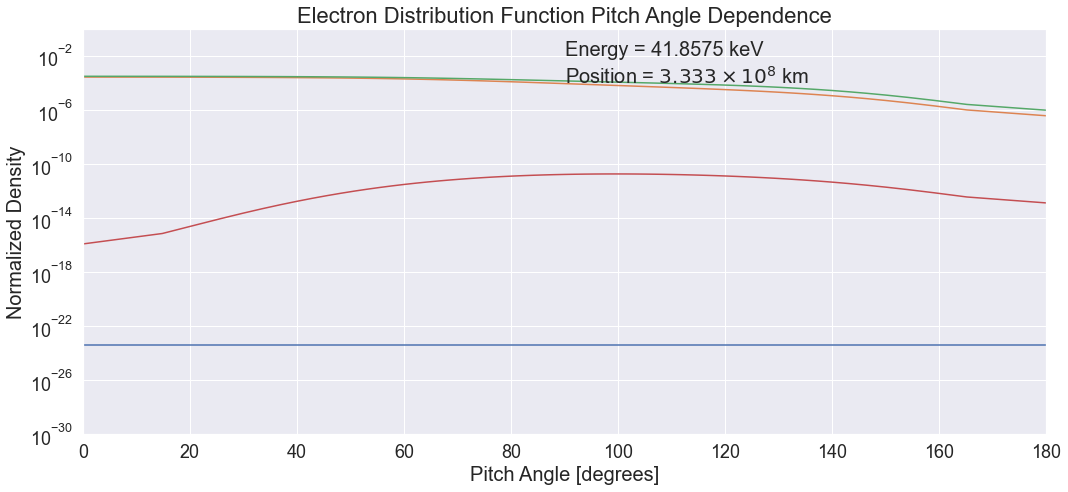

In [19]:
fig, ax = plt.subplots(ncols=1,figsize=(15,7))

ax.set_title(r"Electron Distribution Function Pitch Angle Dependence",fontsize=22)
ax.set_xlabel(r"Pitch Angle [degrees]",fontsize=20)
ax.set_ylabel(r"Normalized Density",fontsize=20)

ax.plot(pad,phiPA0)
ax.plot(pad,phiPA1)
ax.plot(pad,phiPA2)
ax.plot(pad,phiPA3)
ax.plot(pad,phiPA4)

# ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(0,180)
ax.set_ylim(1e-30,1)
ax.text(90, 1.0e-2,r"Energy = %.4f keV"%(ekev[eindex]),fontsize=20)
ax.text(90, 1.0e-4,r"Position = %s km"%(sci_notation(soft[sindex],4,3)),fontsize=20)

# locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=12)
# ax.xaxis.set_minor_locator(locmin)
# ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis='both', which='major', labelsize=18,)


plt.tight_layout()

plt.savefig('./Window1.jpg',dpi=150,bbox_inches= 'tight',pad_inches = 0.05)

<font size="3">Plot 3: variables</font>

<code>IDL
    phiS0 = Reform(phi(eindex,paindex,*,0))
    phiS1 = Reform(phi(eindex,paindex,*,1))
    phiS2 = Reform(phi(eindex,paindex,*,2))
    phiS3 = Reform(phi(eindex,paindex,*,3))
    phiS4 = Reform(phi(eindex,paindex,*,4))
    </code>
    
<font size="3">Plot 3: Window 2</font>

<code>IDL
    Window,2,Title = 'Spatial Dependence'
    plot, soft, phiS0,/YLog,XTitle = 'Distance (cm)', $
      YTitle = 'Normalized Density', $
      Title = 'Electron Distribution Function Spatial Dependence',$
      XRange=[0.,1.E+09],YRange=[1.E-30,1.E00],XStyle=1,YStyle=1
    oplot, soft, phiS1, LineStyle = 1, color=112
    oplot, soft, phiS2, LineStyle = 2, color=208
    oplot, soft, phiS3, LineStyle = 3, color=165
    oplot, soft, phiS4, LineStyle = 4, color=254
    ;Create and position Legend for electron distribution function vs. distance graph
    XYOutS, 5.e8, 1.0E-2, 'Energy = '+ strtrim((ekev(eindex)),2)+' keV', Size = 1.3
    XYOutS, 5.e8, 1.0E-4, 'Pitch Angle = '+ strtrim((pad(paindex)),2)+' deg', Size = 1.3
    </code>

In [20]:
phiS0 = phi[0,:,paindex,eindex].copy()
phiS1 = phi[1,:,paindex,eindex].copy()
phiS2 = phi[2,:,paindex,eindex].copy()
phiS3 = phi[3,:,paindex,eindex].copy()
phiS4 = phi[4,:,paindex,eindex].copy()

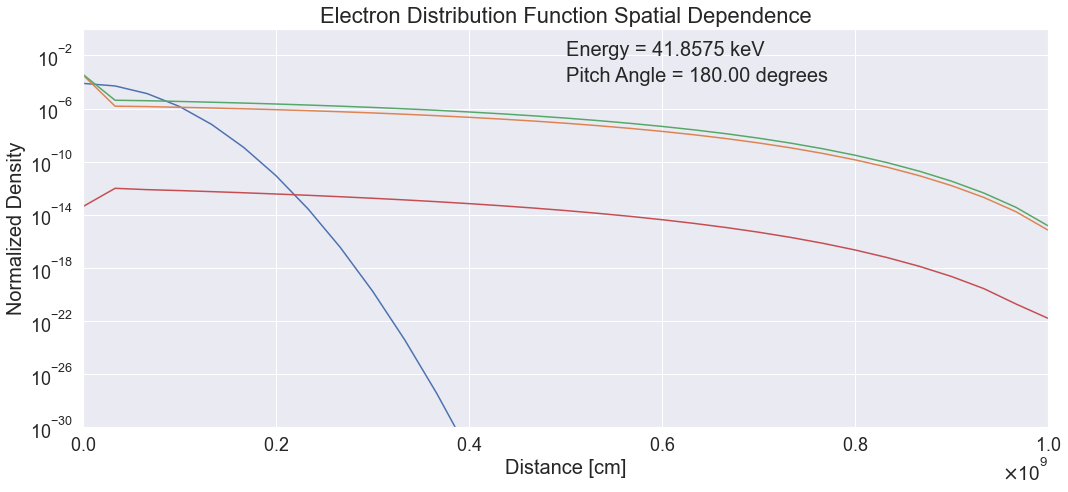

In [21]:
fig, ax = plt.subplots(ncols=1,figsize=(15,7))

ax.set_title(r"Electron Distribution Function Spatial Dependence",fontsize=22)
ax.set_xlabel(r"Distance [cm]",fontsize=20)
ax.set_ylabel(r"Normalized Density",fontsize=20)

ax.plot(soft,phiS0)
ax.plot(soft,phiS1)
ax.plot(soft,phiS2)
ax.plot(soft,phiS3)
ax.plot(soft,phiS4)

# ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(0,1e9)
ax.set_ylim(1e-30,1)
ax.text(5e8, 1.0e-2,r"Energy = %.4f keV"%(ekev[eindex]),fontsize=20)
ax.text(5e8, 1.0e-4,r"Pitch Angle = %.2f degrees"%(pad[paindex]),fontsize=20)

# locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=12)
# ax.xaxis.set_minor_locator(locmin)
# ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis='both', which='major', labelsize=18,)
ax.xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter(useMathText=True))
ax.xaxis.offsetText.set_fontsize(19)


plt.tight_layout()

plt.savefig('./Window2.jpg',dpi=150,bbox_inches= 'tight',pad_inches = 0.05)

<font size="3">Plot 4: variables</font>

<code>IDL
    splt = [0,5,10,20,30]
    phiT0 = Reform(phi(eindex,paindex,splt(0),*))
    phiT1 = Reform(phi(eindex,paindex,splt(1),*))
    phiT2 = Reform(phi(eindex,paindex,splt(2),*))
    phiT3 = Reform(phi(eindex,paindex,splt(3),*))
    phiT4 = Reform(phi(eindex,paindex,splt(4),*))
    </code>
    
<font size="3">Plot 4: Window 3</font>

<code>IDL
    Window,3,Title = 'Time Dependence'
    plot, tr, phiT0,/YLog,XTitle = 'Time (s)', $
      YTitle = 'Normalized Density', $
      Title = 'Electron Distribution Function Time Dependence',$
      XRange=[0.,11.],YRange=[1.E-30,1.E00],XStyle=1,YStyle=1
    oplot, tr, phiT1, LineStyle = 1, color=112
    oplot, tr, phiT2, LineStyle = 2, color=208
    oplot, tr, phiT3, LineStyle = 3, color=165
    oplot, tr, phiT4, LineStyle = 4, color=254
    ;Create and position Legend for electron distribution function vs. time graph
    XYOutS, 5.5, 1.0E-02, 'Energy = '+ strtrim((ekev(eindex)),2)+' keV', Size = 1.3
    XYOutS, 5.5, 1.0E-04, 'Pitch Angle = '+ strtrim((pad(paindex)),2)+' deg', Size = 1.3
    </code>

In [22]:
splt = [0,5,10,20,30]

phiT0 = phi[:,splt[0],paindex,eindex].copy()
phiT1 = phi[:,splt[1],paindex,eindex].copy()
phiT2 = phi[:,splt[2],paindex,eindex].copy()
phiT3 = phi[:,splt[3],paindex,eindex].copy()
phiT4 = phi[:,splt[4],paindex,eindex].copy()

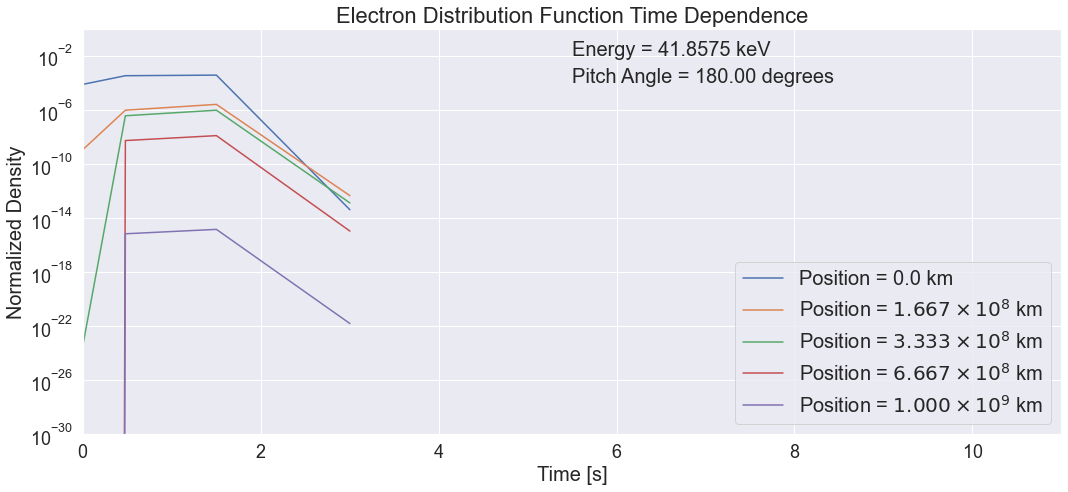

In [23]:
fig, ax = plt.subplots(ncols=1,figsize=(15,7))

ax.set_title(r"Electron Distribution Function Time Dependence",fontsize=22)
ax.set_xlabel(r"Time [s]",fontsize=20)
ax.set_ylabel(r"Normalized Density",fontsize=20)

ax.plot(tr,phiT0,label=r"Position = %s km"%(soft[splt[0]]))
ax.plot(tr,phiT1,label=r"Position = %s km"%(sci_notation(soft[splt[1]],4,3)))
ax.plot(tr,phiT2,label=r"Position = %s km"%(sci_notation(soft[splt[2]],4,3)))
ax.plot(tr,phiT3,label=r"Position = %s km"%(sci_notation(soft[splt[3]],4,3)))
ax.plot(tr,phiT4,label=r"Position = %s km"%(sci_notation(soft[splt[4]],4,3)))

# ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(0,11)
ax.set_ylim(1e-30,1)
ax.text(5.5, 1.0e-2,r"Energy = %.4f keV"%(ekev[eindex]),fontsize=20)
ax.text(5.5, 1.0e-4,r"Pitch Angle = %.2f degrees"%(pad[paindex]),fontsize=20)

# locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=12)
# ax.xaxis.set_minor_locator(locmin)
# ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis='both', which='major', labelsize=18,)
ax.xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter(useMathText=True))
ax.xaxis.offsetText.set_fontsize(19)
ax.legend(loc=4,fontsize=20)

plt.tight_layout()

plt.savefig('./Window3.jpg',dpi=150,bbox_inches= 'tight',pad_inches = 0.05)

In [24]:
ntr

8

In [32]:
(chuncksize/9)+(45)

12861.777777777777

In [30]:
(newr+1), (2*nmu+1), (ntau+1)

(61, 61, 31)

In [33]:
187263/9

20807.0

In [34]:
ntr

8

In [35]:
chuncksize

115351